# Aufgabe 1
## Abstand Minima

In [51]:
posmax = pd.read_csv("233\\posmax.csv", index_col=0)
posmin = pd.read_csv("233\\posmin.csv", index_col=0)
posmin.iloc[0,0] = nan

pos0 = append(posmin.mean(axis=1),posmax.mean(axis=1))[1:].mean()
dpos0 = sqrt(5*(2.5/sqrt(2))**2 + 4*(1.5/sqrt(2))**2)/9
valerr("x_0", pos0, dpos0, 2, "px")

dposmin = sqrt(dpos0**2 + 1.5**2)
display(dposmin)
dposmax = sqrt(dpos0**2 + 2.5**2)
display(dposmax)

posmin = posmin.join(pd.Series(posmin.iloc[:,0]-pos0, name="Abstand rechts"))
posmin = posmin.join(pd.Series(abs(posmin.iloc[:,1]-pos0), name="Abstand links"))
posmin = posmin.join(pd.Series(posmin.iloc[:,2:4].mean(axis=1), name="Abstand mittel"))
display(posmin)

posmax = posmax.join(pd.Series(posmax.iloc[:,0]-pos0, name="Abstand rechts"))
posmax = posmax.join(pd.Series(abs(posmax.iloc[:,1]-pos0), name="Abstand links"))
posmax = posmax.join(pd.Series(posmax.iloc[:,2:4].mean(axis=1), name="Abstand mittel"))
display(posmax)

<IPython.core.display.Latex object>

1.5806507489396437

2.549207090474106

,Min rechts,Min links,Abstand rechts,Abstand links,Abstand mittel
1,NaN,837.52,NaN,37.173333,37.173333
2,949.96,799.43,75.266667,75.263333,75.265000
3,987.44,762.56,112.746667,112.133333,112.440000
4,1024.92,725.70,150.226667,148.993333,149.610000
5,1059.94,687.61,185.246667,187.083333,186.165000


,Max rechts,Max links,Abstand rechts,Abstand links,Abstand mittel
1,927.22,822.16,52.526667,52.533333,52.53
2,967.16,782.22,92.466667,92.473333,92.47
3,1004.03,744.13,129.336667,130.563333,129.95
4,1041.50,708.50,166.806667,166.193333,166.50
5,1078.37,671.63,203.676667,203.063333,203.37


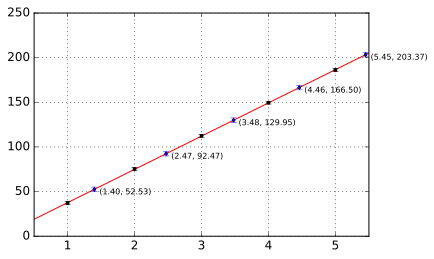

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [67]:
lin = lambda x, a, b: a*x + b

from scipy.optimize import curve_fit
popt, pcov = curve_fit(lin, posmin.index.values, posmin.iloc[:,4], sigma=dposmin)

figure()
plot(arange(0.5,5.5, 0.01), lin(arange(0.5,5.5, 0.01), *popt), 'r-')
errorbar(posmin.index.values, posmin.iloc[:,4], yerr=dposmin, fmt='ks')
errorbar((posmax.iloc[:,4]-popt[1])/popt[0], posmax.iloc[:,4], yerr=dposmax, fmt='bo')
for i in range(5):
    annotate("({0:.2f}, {1:.2f})".format((posmax.iloc[i,4]-popt[1])/popt[0], posmax.iloc[i,4]),
             xy=((posmax.iloc[i,4]-popt[1])/popt[0], posmax.iloc[i,4]), xycoords='data', fontsize=8,
             xytext=(5,-5), textcoords='offset points')
xlim((0.5,5.5))
xticks(arange(1,6,1))
grid()
show()

a = popt[0]
da = sqrt(pcov[0][0])

valerr("a", a, da,2)
valerr("b", popt[1], sqrt(pcov[1][1]),2)

## Eichung

,cam,spalt
0,105.61,0.120
1,147.78,0.240
2,216.34,0.355
3,291.22,0.485


<IPython.core.display.Latex object>

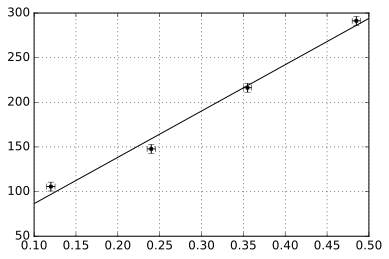

In [45]:
eichung = pd.read_csv("233\\eichung.csv")
display(eichung)

from scipy.odr import RealData, Model, ODR
dat = RealData(x=eichung.iloc[:,1], y=eichung.iloc[:,0], sx=0.005, sy=5)
f = lambda p, x: p[0]*x +p[1]
modf = Model(f)
odr = ODR(dat, modf, [300, -1])
out = odr.run()
# out.pprint()

beta = out.beta[0]
dbeta = out.sd_beta[0]
valerr("\\beta", beta, dbeta,0)

figure()
errorbar(eichung.iloc[:,1], eichung.iloc[:,0], xerr=0.005, yerr=5, fmt="ks")
plot(arange(0.1,0.5,0.0001), f(out.beta,arange(0.1,0.5,0.0001)), 'k-')
grid()
show()

## Spaltbreite

In [72]:
f1 = 80
df1 =0.5

l = 635e-6

d = f1*l*beta/a
dd = d * sqrt((df1/f1)**2 + (dbeta/beta)**2 + (da/a)**2)
valerr("d", d, dd, 5, "mm")

<IPython.core.display.Latex object>

In [74]:
n = arange(1,6,1)
tposmin = f1*l/d * n
dtposmin = tposmin * sqrt((df1/f1)**2 + (dd/d)**2)
display(pd.DataFrame.from_items([("$\Delta_T$", tposmin),
                                 ("$\Delta \Delta_T$", dtposmin),
                                 ("$\Delta_E$", posmin.iloc[:,4]/beta),
                                 ("$\Delta \Delta_E$", posmin.iloc[:,4]/beta * sqrt((dbeta/beta)**2 + (dposmin/posmin.iloc[:,4])**2))
                                ]).round(3))

,$\Delta_T$,$\Delta \Delta_T$,$\Delta_E$,$\Delta \Delta_E$
1,0.072,0.006,0.072,0.006
2,0.144,0.011,0.145,0.012
3,0.215,0.017,0.217,0.017
4,0.287,0.022,0.288,0.023
5,0.359,0.028,0.359,0.028


## Beugungsordnung und Intensität der Maxima

In [119]:
from scipy.optimize import fmin

def f(n): return -(sin(pi*n))**2/(pi*n)**2

nmax = array([])

for i in range(5):
    nmax = append(nmax,fmin(f, i+1.5, disp=False)[0])

display(nmax)


intmax = pd.read_csv("233\\intmax.csv", index_col=0)

intm = intmax.mean(axis=1)
intm.name = "int mean"

intmax = intmax.join(intm)

I0 = 3728.5
dI = 9

dIm = dI/sqrt(2)

a0 = array([218/I0, 211.5/I0]).mean()
da0 = sqrt(((dI/218)**2 + (dI/I0)**2) + ((dI/218)**2 + (dI/I0)**2))/2
alpha = intmax.iloc[:,2] * a0/intmax.iloc[0,2]
alpha.name = r"$\alpha$"
dalpha = alpha * sqrt((dIm/intmax.iloc[:,2])**2 + (da0/a0)**2)
dalpha.name = r"$\Delta \alpha$"

intmax = intmax.join(alpha)
intmax = intmax.join(dalpha)
intmax = intmax.join(pd.Series(-f(nmax), name=r"$\alpha_T$", index=intmax.index))
display(intmax.round(4))
display(Latex(r"$\Delta \overline{{I}} = {0:.1f}$".format(dIm)))

array([ 1.43027344,  2.45904541,  3.47086182,  4.4774231 ,  5.48153687])

,Max rechts,Max links,int mean,$\alpha$,$\Delta \alpha$,$\alpha_T$
1,1389.5,1246.0,1317.75,0.0576,0.0292,0.0472
2,492.5,493.0,492.75,0.0215,0.0109,0.0165
3,232.0,215.5,223.75,0.0098,0.0050,0.0083
4,148.0,131.0,139.50,0.0061,0.0031,0.0050
5,96.5,89.5,93.00,0.0041,0.0021,0.0034


<IPython.core.display.Latex object>

# Aufgabe 2
## Theoretische Beugungstruktur

In [121]:
p = 14e-3

d_ = (114.69 + 115.28)/2
dd_ = 0.5/sqrt(2)

valerr("d'",d_, dd_, 3, "px")

g_ = (300.42 + 301.00)/2
dg_ = dd_

valerr("g'",g_, dg_, 3, "px")

d_ *= p
dd_ *= p
g_ *= p
dg_ *= p

valerr("d'",d_, dd_, 3, "mm")
valerr("g'",g_, dg_, 3, "mm")

b1 = 65.4e+1
db1 = 0.1e+1

b = b1/f1 - 1
db = sqrt((db1/f1)**2 + (b1/f1**2 * df1)**2)

valerr(r"\beta", b, db, 3)

d = d_/b
dd = d * sqrt((db/b)**2 + (dd_/d_)**2)

valerr("d", d, dd, 3, "mm")

g = g_/b
dg = g * sqrt((db/b)**2 + (dg_/g_)**2)

valerr("g", g, dg, 3, "mm")

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

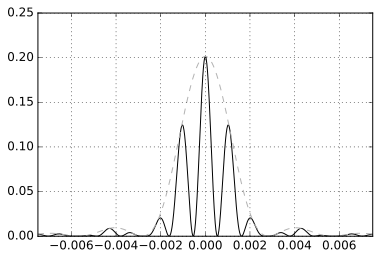

In [134]:
def I1(x):
    return 4 * d**2 * sin(pi*d/l * sin(x))**2/(pi*d/l * sin(x))**2

def I2(x):
    return cos(pi*g/l * sin(x))**2 * I1(x)

x_ = linspace(-0.0075,0.0075,1000)

figure()
plot(x_, I2(x_), 'k-')
plot(x_, I1(x_), '--',color='0.7')
xlim((-0.0075,0.0075))
grid()
show()

In [177]:
def I(x, pg=g, pd=d):
    return -cos(pi*pg/l * sin(x))**2 * sin(pi*pd/l * sin(x))**2/(pi*pd/l * sin(x))**2

amax = array([fmin(I, 0.001, disp=False)[0],fmin(I, 0.002, disp=False)[0]])
# display(amax)

Ith = -I(amax)
dIth = abs(array([[-fmin(I, 0.001,args=(g+dg,d+dd), disp=False, full_output=True)[1],
               -fmin(I, 0.002,args=(g+dg,d+dd), disp=False, full_output=True)[1]]-Ith,
              [-fmin(I, 0.001,args=(g-dg,d+dd), disp=False, full_output=True)[1],
               -fmin(I, 0.002,args=(g-dg,d+dd), disp=False, full_output=True)[1]]-Ith,
              [-fmin(I, 0.001,args=(g+dg,d-dd), disp=False, full_output=True)[1],
               -fmin(I, 0.002,args=(g+dg,d-dd), disp=False, full_output=True)[1]]-Ith,
              [-fmin(I, 0.001,args=(g-dg,d-dd), disp=False, full_output=True)[1],
               -fmin(I, 0.002,args=(g-dg,d-dd), disp=False, full_output=True)[1]]-Ith])).max(axis=0)
display(Ith,dIth)

I0 = 3677.5

double = pd.read_csv("233\\double.csv", index_col=0)
double = double.join(pd.Series(double.mean(axis=1), name="mittlere Intensität"))
double = double.join(pd.Series(double.mean(axis=1)/I0, name="Verhältnis exp"))
double = double.join(pd.Series(double.mean(axis=1)/I0 * sqrt((dI/I0)**2 + (dI/double.mean(axis=1))**2), name="$\Delta$ Verhältnis exp"))
double = double.join(pd.Series(Ith, name="Verhältnis theo", index=[1,2]))
double = double.join(pd.Series(dIth, name="$\Delta$ Verhältnis theo", index=[1,2]))

display(double)

array([ 0.61907075,  0.10160248])

array([ 0.00913348,  0.00892252])

,Intensität links,Intensität rechts,mittlere Intensität,Verhältnis exp,$\Delta$ Verhältnis exp,Verhältnis theo,$\Delta$ Verhältnis theo
1,2389.0,2395.0,2392.0,0.650442,0.002723,0.619071,0.009133
2,233.5,223.5,228.5,0.062135,0.002450,0.101602,0.008923


# Aufgabe 3

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

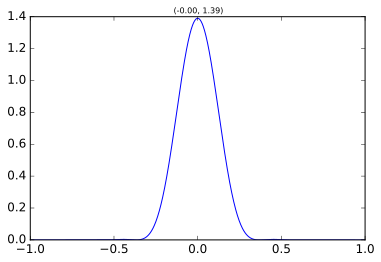

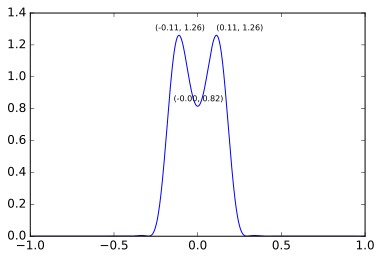

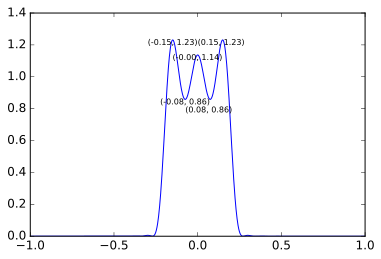

In [229]:
d_ = 229.29 * p
dd_ = 0.6 * p
valerr("d'", d_, dd_, 3, "mm")

d = d_/b
dd = d * sqrt((db/b)**2 + (dd_/d_)**2)
valerr("d", d, dd, 3, "mm")

k,y,n = sm.symbols('k_n y n')

f = lambda k,y: d/pi * sin(k*d/2)/(k*d/2) * cos(k*y)

from scipy.integrate import quad

x_ = linspace(-1,1,1000)
y_1 = [quad(f, 0, 2*pi*1/d, (i))[0]**2 for i in x_]
y_2 = [quad(f, 0, 2*pi*2/d, (i))[0]**2 for i in x_]
y_3 = [quad(f, 0, 2*pi*3/d, (i))[0]**2 for i in x_]


from detect_peaks import detect_peaks
pind1 = [*detect_peaks(y_1, mph=0.8), *setdiff1d(detect_peaks(y_1, valley=True, mph=-1.0),detect_peaks(y_1, valley=True, mph=-0.5))]
pind2 = [*detect_peaks(y_2, mph=0.8), *setdiff1d(detect_peaks(y_2, valley=True, mph=-1.0),detect_peaks(y_2, valley=True, mph=-0.5))]
pind3 = [*detect_peaks(y_3, mph=0.8), *setdiff1d(detect_peaks(y_3, valley=True, mph=-1.0),detect_peaks(y_3, valley=True, mph=-0.5))]

figure()
plot(x_, y_1)
for i in range(len(pind1)):
    annotate("({0:.2f}, {1:.2f})".format(x_[pind1[i]],y_1[pind1[i]]), xy=(x_[pind1[i]],y_1[pind1[i]]), xycoords='data',
             fontsize=8, xytext=(-12-12*(-1)**i,5), textcoords='offset points')
show()

figure()
plot(x_, y_2)
for i in range(len(pind2)):
    annotate("({0:.2f}, {1:.2f})".format(x_[pind2[i]],y_2[pind2[i]]), xy=(x_[pind2[i]],y_2[pind2[i]]), xycoords='data',
             fontsize=8, xytext=(-12-12*(-1)**i,5), textcoords='offset points')
show()
figure()
plot(x_, y_3)
for i in range(len(pind3)):
    annotate("({0:.2f}, {1:.2f})".format(x_[pind3[i]],y_3[pind3[i]]), xy=(x_[pind3[i]],y_3[pind3[i]]), xycoords='data',
             fontsize=8, xytext=(-25,-5+2*((i%4)-i)), textcoords='offset points')
show()

In [252]:
I1 = 3869.0
I2max = array([3654.5, 3750.0]).mean()
I2min = 2843.5
I3max = array([[3652,3693.5],[3551.5,3551.5]]).mean(axis=1)
I3min = array([2855.5, 3038.5]).mean()

Iex = array([I1,I2max,I2min,*I3max,I3min])

dIex = array([9,9/sqrt(2),9,9/sqrt(2),9,9/sqrt(2)])

Ith = array([1.39,1.26,0.82,1.23,1.14,0.86])

Iout = pd.DataFrame.from_items([(r"$I_{{Theorie}}$",Ith),
                                (r"$\frac{{I}}{{I_0}}_{{Theorie}}$",Ith/Ith[0]*100),
                                (r"$I_{{Experiment}}$",Iex),
                                (r"$\Delta I_{{Experiment}}$",dIex),
                                (r"$\frac{{I}}{{I_0}}_{{Experiment}}$",Iex/Iex[0]*100),
                                (r"$\Delta \frac{{I}}{{I_0}}_{{Experiment}}$",array([0,*((Iex/Iex[0]*sqrt((dIex/Iex)**2+(dIex[0]/Iex[0])**2))[1:])])*100)
                               ])
Iout.index = ["Max (n=1)","Max (n=2)","Min (n=2)","Max außen (n=3)","Max mitte (n=3)","Min (n=3)"]
display(Iout.round(2))

,$I_{{Theorie}}$,$\frac{{I}}{{I_0}}_{{Theorie}}$,$I_{{Experiment}}$,$\Delta I_{{Experiment}}$,$\frac{{I}}{{I_0}}_{{Experiment}}$,$\Delta \frac{{I}}{{I_0}}_{{Experiment}}$
Max (n=1),1.39,100.00,3869.00,9.00,100.00,0.00
Max (n=2),1.26,90.65,3702.25,6.36,95.69,0.28
Min (n=2),0.82,58.99,2843.50,9.00,73.49,0.29
Max außen (n=3),1.23,88.49,3672.75,6.36,94.93,0.28
Max mitte (n=3),1.14,82.01,3551.50,9.00,91.79,0.32
Min (n=3),0.86,61.87,2947.00,6.36,76.17,0.24


# Aufgabe 4

In [254]:
fsynt = pd.read_csv("233\\fsynt.csv")
valerr(r"\Delta_{{max}}", fsynt["max"].mean(), fsynt["max"].std(), 2, "px")
valerr(r"\Delta_{{min}}", fsynt["min"].mean(), fsynt["min"].std(), 2, "px")

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>